In [21]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
import pandas as pd

In [22]:
# 读取数据文件
data1 = pd.read_excel("附件1.xlsx")
data2 = pd.read_csv("附件2.csv", encoding='ANSI')
data3 = pd.read_excel("附件3.xlsx")
data4 = pd.read_excel("附件4.xlsx")

In [23]:
# 初始化一个包含6个0.0的列表
class_list = [0.0]*6

# 创建一个1094x6的二维NumPy数组，用于存储销量数据
all_list = np.array([class_list]*1094)

In [24]:
# 定义一个字典，将类别名称映射到数字
tinydict = {'花叶类': 0, '花菜类': 1, '水生根茎类': 2, '茄类': 3, '辣椒类': 4, '食用菌': 5}

In [25]:
#tinydict[data1[data1["单品编码"] == data2.iloc[0][2]].iloc[0][3]]

In [26]:
# 初始化一个包含6个0.0的列表
class_list = [0.0]*6

# 创建一个1094x6的二维NumPy数组，用于存储销量数据
all_list = np.array([class_list]*1095)

# 将日期字符串解析为datetime对象
time0 = datetime.datetime.strptime('2020-07-01', "%Y-%m-%d")

# 遍历数据2中的每一行
for i in range(len(data2)):
    # 每处理10000行打印一次进度
    if i % 10000 == 0:
        print(i)

    # 解析日期字符串为datetime对象
    time_tmp = datetime.datetime.strptime(data2.iloc[i][0], "%Y-%m-%d")

    # 计算时间间隔（天数）
    index_1 = (time_tmp - time0).days

    # 从data1中获取对应类别的数字编码
    index_2 = tinydict[data1[data1["单品编码"] == data2.iloc[i][2]].iloc[0][3]]

    # 将销量数据添加到对应位置
    all_list[index_1][index_2] += data2.iloc[i][3]
    # print(index_1," ",index_2," ",data2.iloc[i][3])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000


In [27]:
pd.DataFrame(all_list).to_csv("A1_result.csv")

In [28]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

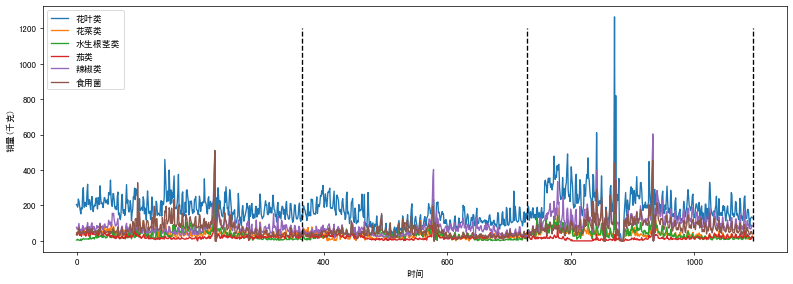

In [29]:
# 创建一个15x5英寸的图表
my_dpi = 64
plt.figure(figsize=(15, 5), dpi=my_dpi)

# 绘制时间序列图
plt.plot(all_list)
plt.plot([365, 365], [0, 1200], '--', color='k')
plt.plot([365 + 365, 365 + 365], [0, 1200], '--', color='k')
plt.plot([365 + 365 + 365, 365 + 365 + 365], [0, 1200], '--', color='k')

# 添加图例和标签
plt.legend(['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'])
plt.xlabel('时间')
plt.ylabel('销量(千克)')

# 显示图表
plt.show()

In [30]:
# 计算总销量
sum_all_list = sum(all_list)

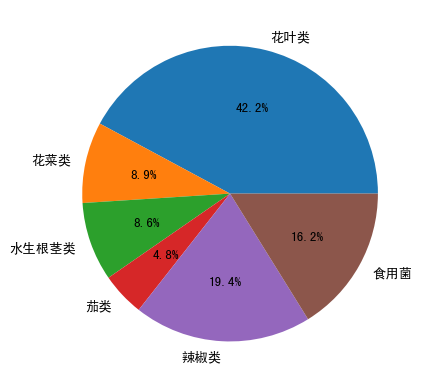

In [31]:
# 创建一个饼图
my_dpi = 96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
plt.pie(x=sum_all_list, labels=['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'], autopct='%.1f%%')

# 显示饼图
plt.show()

In [32]:
# 创建DataFrame用于绘制散点图矩阵
A1_result = pd.DataFrame(all_list)

In [33]:
A1_result.columns = ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']

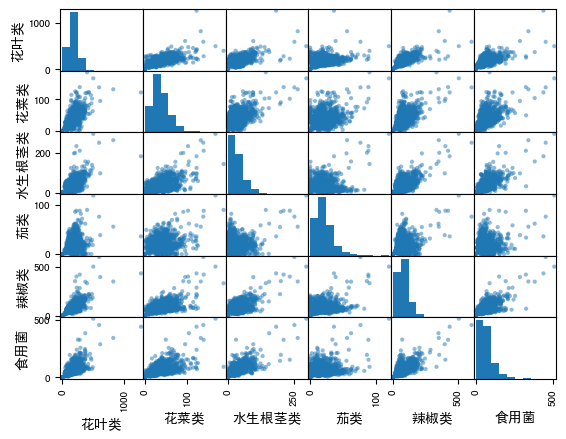

In [34]:
# 绘制散点图矩阵 Scatter Matrix 散布矩阵
pd.plotting.scatter_matrix(A1_result,alpha = 0.5)
plt.show()

In [35]:
# 计算销量数据的相关系数矩阵
data_matrix = np.corrcoef(A1_result.T)

In [36]:
# 定义 x 轴和 y 轴的标签
xLabel = ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']
yLabel = ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']


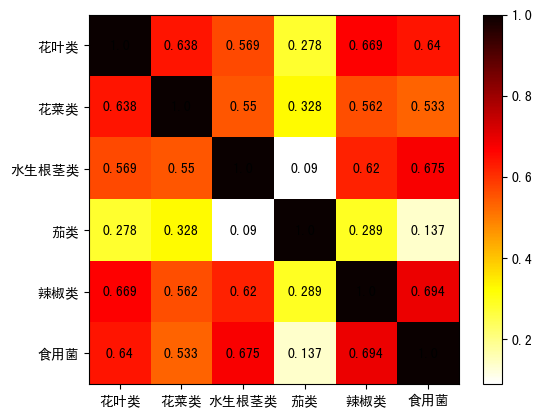

In [37]:
# 创建一个新的图表
fig = plt.figure()
ax = fig.add_subplot(111)

# 绘制相关系数矩阵的热图
im = ax.imshow(data_matrix, cmap=plt.cm.hot_r)
plt.colorbar(im)

# 设置 x 轴的刻度和标签
ax.set_xticks(range(len(xLabel)))
ax.set_xticklabels(xLabel)

# 设置 y 轴的刻度和标签
for i in range(len(yLabel)):
    for j in range(len(xLabel)):
        # 在热图上显示相关系数的数值
        ax.text(j, i, round(data_matrix[i, j], 3), ha="center", va="center", color="black")

ax.set_yticks(range(len(yLabel)))
ax.set_yticklabels(yLabel)

# 显示热图
plt.show()

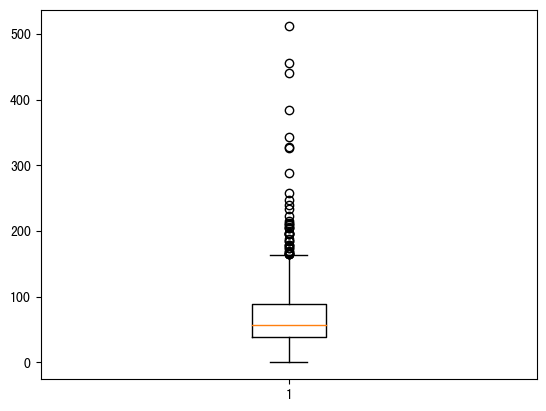

In [38]:
# 绘制箱线图
plt.boxplot(all_list[:, 5])

# 显示箱线图
plt.show()

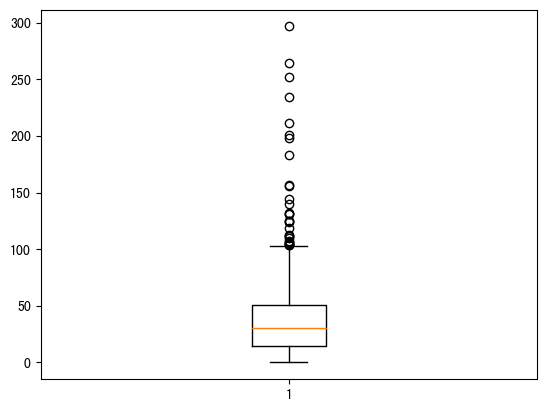

In [39]:
# 绘制箱线图
plt.boxplot(all_list[:,2])
plt.show()